In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df1 = pd.read_csv('train.csv')
df1.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [38]:
data = df1.drop(['PassengerId'],axis=1)
data.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
data.shape

(8693, 13)

In [185]:
# find categorical variables

categorical = [var for var in df1.columns if df1[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 7 categorical variables

The categorical variables are : ['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP', 'Name']


In [187]:
df1[categorical].head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,False,Maham Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,False,Juanna Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,True,Altark Susent
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,False,Solam Susent
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,False,Willy Santantines


In [6]:
data.corr()

C:\Users\shara\AppData\Local\Temp\ipykernel_35060\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
Age,1.000000,0.068723,0.130421,0.033133,0.123970,0.101007,-0.075026
RoomService,0.068723,1.000000,-0.015889,0.054480,0.010080,-0.019581,-0.244611
FoodCourt,0.130421,-0.015889,1.000000,-0.014228,0.221891,0.227995,0.046566
ShoppingMall,0.033133,0.054480,-0.014228,1.000000,0.013879,-0.007322,0.010141
Spa,0.123970,0.010080,0.221891,0.013879,1.000000,0.153821,-0.221131
VRDeck,0.101007,-0.019581,0.227995,-0.007322,0.153821,1.000000,-0.207075
Transported,-0.075026,-0.244611,0.046566,0.010141,-0.221131,-0.207075,1.000000


Correlation coefficients whose magnitude are between 0.7 and 0.9 indicate variables which can be considered highly correlated

C:\Users\shara\AppData\Local\Temp\ipykernel_35060\2808442434.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(data.corr(), annot=True)


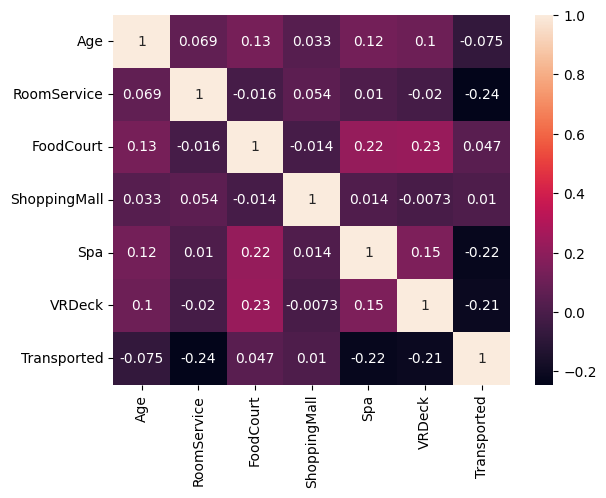

In [7]:
ax = sns.heatmap(data.corr(), annot=True)

NO significant corr

Label encoding

In [8]:
data.head(3)

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False


In [140]:
df1.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [132]:
data.isna().sum()

HomePlanet      201
CryoSleep       217
Cabin             0
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
Cabin_side        0
dtype: int64

There are many missing values so we'll use MissForest to gain them

In [133]:
data[data.isnull().any(axis=1)]

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cabin_side
7,0.0,True,G/0/S,2.0,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True,S
10,1.0,True,B/1/P,2.0,34.0,False,0.0,0.0,NaN,0.0,0.0,Altardr Flatic,True,P
16,2.0,False,F/3/P,0.0,27.0,False,1286.0,122.0,NaN,0.0,0.0,Flats Eccle,False,P
23,0.0,True,E/0/S,0.0,29.0,False,0.0,0.0,NaN,0.0,0.0,Mollen Mcfaddennon,False,S
25,0.0,True,E/0/S,1.0,1.0,False,NaN,0.0,0.0,0.0,0.0,Mael Brantuarez,False,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8667,1.0,False,E/597/P,2.0,29.0,False,0.0,2972.0,NaN,28.0,188.0,Chain Reedectied,True,P
8674,NaN,False,F/1892/P,2.0,13.0,False,39.0,0.0,1085.0,24.0,0.0,Ties Apple,False,P
8675,0.0,NaN,F/1893/P,2.0,44.0,False,1030.0,1015.0,0.0,11.0,NaN,Annah Gilleyons,True,P
8684,NaN,True,G/1508/P,2.0,23.0,False,0.0,0.0,0.0,0.0,0.0,Chelsa Bullisey,True,P


In [74]:
data.head(50)

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,1.0,False,149.0,2.0,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0.0,False,2184.0,2.0,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,1.0,False,1.0,2.0,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,1.0,False,1.0,2.0,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0.0,False,2186.0,2.0,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0.0,False,2183.0,1.0,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0.0,False,3425.0,2.0,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0.0,True,4559.0,2.0,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0.0,False,3565.0,2.0,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,1.0,True,150.0,0.0,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


In [71]:
data['Destination'].unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', nan], dtype=object)

In [134]:
import numpy as np

In [72]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
data['Destination']= label_encoder.fit_transform(data['Destination'])
data['Destination'].unique()

array([2, 1, 0, 3])

In [73]:
data['Destination'].replace(3,np.nan,inplace=True)

In [77]:
data1 = data

In [80]:
data1.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,1.0,False,B/0/P,2.0,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0.0,False,F/0/S,2.0,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,1.0,False,A/0/S,2.0,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,1.0,False,A/0/S,2.0,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0.0,False,F/1/S,2.0,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [79]:
data1.Cabin = df1.Cabin

In [128]:
import regex as re
def use_regex(input_text):
    pattern = re.search("([^/]+$)", input_text)
    return pattern.group(1)

In [86]:
data.Cabin = data.Cabin.astype('str')

In [129]:
data1['Cabin_side'] = data.apply(lambda row: use_regex(row['Cabin']),axis=1)

In [127]:
a='F/0/S'
b=re.search("([^/]+$)", a)
print(type(b.group(1)))

<class 'str'>


In [135]:
data1[data1.isnull().any(axis=1)]

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cabin_side
7,0.0,True,G/0/S,2.0,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True,S
10,1.0,True,B/1/P,2.0,34.0,False,0.0,0.0,NaN,0.0,0.0,Altardr Flatic,True,P
16,2.0,False,F/3/P,0.0,27.0,False,1286.0,122.0,NaN,0.0,0.0,Flats Eccle,False,P
23,0.0,True,E/0/S,0.0,29.0,False,0.0,0.0,NaN,0.0,0.0,Mollen Mcfaddennon,False,S
25,0.0,True,E/0/S,1.0,1.0,False,NaN,0.0,0.0,0.0,0.0,Mael Brantuarez,False,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8667,1.0,False,E/597/P,2.0,29.0,False,0.0,2972.0,NaN,28.0,188.0,Chain Reedectied,True,P
8674,NaN,False,F/1892/P,2.0,13.0,False,39.0,0.0,1085.0,24.0,0.0,Ties Apple,False,P
8675,0.0,NaN,F/1893/P,2.0,44.0,False,1030.0,1015.0,0.0,11.0,NaN,Annah Gilleyons,True,P
8684,NaN,True,G/1508/P,2.0,23.0,False,0.0,0.0,0.0,0.0,0.0,Chelsa Bullisey,True,P


In [136]:
data1['Cabin_side'].unique()

array(['P', 'S', 'nan'], dtype=object)

In [ ]:
import numpy as np

In [137]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
data1['Cabin_side']= label_encoder.fit_transform(data1['Cabin_side'])
data1['Cabin_side'].unique()

array([0, 1, 2])

In [138]:
data1['Cabin_side'].replace(2,np.nan,inplace=True)

In [147]:
data1.head(50)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_side
0,1.0,False,2.0,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0.0
1,0.0,False,2.0,24.0,False,109.0,9.0,25.0,549.0,44.0,True,1.0
2,1.0,False,2.0,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,1.0
3,1.0,False,2.0,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,1.0
4,0.0,False,2.0,16.0,False,303.0,70.0,151.0,565.0,2.0,True,1.0
5,0.0,False,1.0,44.0,False,0.0,483.0,0.0,291.0,0.0,True,0.0
6,0.0,False,2.0,26.0,False,42.0,1539.0,3.0,0.0,0.0,True,1.0
7,0.0,True,2.0,28.0,False,0.0,0.0,0.0,0.0,NaN,True,1.0
8,0.0,False,2.0,35.0,False,0.0,785.0,17.0,216.0,0.0,True,1.0
9,1.0,True,0.0,14.0,False,0.0,0.0,0.0,0.0,0.0,True,0.0


In [143]:
data1 = data1.drop(['Cabin'],axis=1)

In [146]:
data1 = data1.drop(['Name'],axis=1)

In [149]:
data1.shape

(8693, 12)

In [150]:
data1.isna().sum()

HomePlanet      201
CryoSleep       217
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
Cabin_side      199
dtype: int64

In [3]:
data1 = pd.read_csv('MissForest_data.csv')
data1.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_side
0,1.0,False,2.0,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0.0
1,0.0,False,2.0,24.0,False,109.0,9.0,25.0,549.0,44.0,True,1.0
2,1.0,False,2.0,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,1.0
3,1.0,False,2.0,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,1.0
4,0.0,False,2.0,16.0,False,303.0,70.0,151.0,565.0,2.0,True,1.0


In [4]:
import sklearn.neighbors._base
import sys
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
from missingpy import MissForest


In [5]:
# Make an instance and perform the imputation
imputer = MissForest()
X = data1.drop('Transported', axis=1)
X_imputed = imputer.fit_transform(X)

c:\Users\shara\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
c:\Users\shara\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
c:\Users\shara\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
c:\Users\shara\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: Fu

Iteration: 0


c:\Users\shara\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
c:\Users\shara\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
c:\Users\shara\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
c:\Users\shara\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: Fu

Iteration: 1


c:\Users\shara\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
c:\Users\shara\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
c:\Users\shara\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
c:\Users\shara\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: Fu

Iteration: 2


c:\Users\shara\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
c:\Users\shara\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
c:\Users\shara\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
c:\Users\shara\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: Fu

Iteration: 3


c:\Users\shara\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
c:\Users\shara\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


In [6]:
mf_imputed_data = pd.DataFrame(X_imputed)

In [7]:
data1.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_side
0,1.0,False,2.0,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0.0
1,0.0,False,2.0,24.0,False,109.0,9.0,25.0,549.0,44.0,True,1.0
2,1.0,False,2.0,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,1.0
3,1.0,False,2.0,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,1.0
4,0.0,False,2.0,16.0,False,303.0,70.0,151.0,565.0,2.0,True,1.0


In [8]:
mf_imputed_data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1.0,0.0,2.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,2.0,24.0,0.0,109.0,9.0,25.0,549.0,44.0,1.0
2,1.0,0.0,2.0,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,1.0
3,1.0,0.0,2.0,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,1.0
4,0.0,0.0,2.0,16.0,0.0,303.0,70.0,151.0,565.0,2.0,1.0


In [9]:
#copying column names
data_without_y = data1.drop(['Transported'],axis=1)

In [10]:
mf_imputed_data = pd.DataFrame(data=mf_imputed_data.values, columns=data_without_y.columns)

In [11]:
mf_imputed_data.head(3)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_side
0,1.0,0.0,2.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,2.0,24.0,0.0,109.0,9.0,25.0,549.0,44.0,1.0
2,1.0,0.0,2.0,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,1.0


In [12]:
mf_imputed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   float64
 1   CryoSleep     8693 non-null   float64
 2   Destination   8693 non-null   float64
 3   Age           8693 non-null   float64
 4   VIP           8693 non-null   float64
 5   RoomService   8693 non-null   float64
 6   FoodCourt     8693 non-null   float64
 7   ShoppingMall  8693 non-null   float64
 8   Spa           8693 non-null   float64
 9   VRDeck        8693 non-null   float64
 10  Cabin_side    8693 non-null   float64
dtypes: float64(11)
memory usage: 747.2 KB


In [13]:
#creating final dataset
mf_imputed_data['Transported'] = data1['Transported']

fitting encoder

In [51]:
data2 = pd.read_csv('train.csv').drop(['PassengerId','Name'],axis=1)
data2.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [52]:
data2.Cabin = data2.Cabin.astype('str')

In [53]:
import regex as re
def use_regex(input_text):
    pattern = re.search("([^/]+$)", input_text)
    return pattern.group(1)

In [54]:
data2['Cabin_side'] = data2.apply(lambda row: use_regex(row['Cabin']),axis=1)

In [55]:
data2.drop(['Cabin'],axis=1,inplace=True)

In [62]:
data2.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,S


In [63]:
mf_imputed_data.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_side,Transported
0,1.0,0.0,2.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
1,0.0,0.0,2.0,24.0,0.0,109.0,9.0,25.0,549.0,44.0,1.0,True
2,1.0,0.0,2.0,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,1.0,False
3,1.0,0.0,2.0,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,1.0,False
4,0.0,0.0,2.0,16.0,0.0,303.0,70.0,151.0,565.0,2.0,1.0,True


In [66]:
data2.isnull().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
Cabin_side      0
dtype: int64

In [59]:
pd.get_dummies(data2.HomePlanet, drop_first=True, dummy_na=True).head()

,Europa,Mars,NaN
0,1,0,0
1,0,0,0
2,1,0,0
3,1,0,0
4,0,0,0


In [60]:
pd.get_dummies(data2.HomePlanet, drop_first=True, dummy_na=True).sum(axis=0)

Europa    2131
Mars      1759
NaN        201
dtype: int64

In [67]:
data2.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,S


In [68]:
data2.HomePlanet.unique()

array(['Europa', 'Earth', 'Mars', 1.0880766574528657, 0.97,
       0.5632332112332111, 1.18, 1.0, 0.9001188745166685,
       0.6017539682539683, 1.76, 0.02, 1.024, 1.92, 0.05,
       0.6167837070231434, 0.9618611111111111, 0.9937532734657316,
       0.8825548340548344, 0.72, 1.66, 0.0, 1.58, 0.9617072490491816,
       1.011176767676768, 1.14, 0.11, 1.1645380697304075, 0.98, 0.33,
       0.04, 0.32, 0.38, 0.6892817893320989, 0.03, 0.24,
       0.7856997316578758, 0.8951746129211188, 0.8822572854230682, 0.01,
       0.9, 0.9801589997587641, 0.10733333333333332, 0.4210336395630513,
       0.7924823550072071, 0.8481307858807858, 1.85, 1.0562142857142858,
       0.96, 1.55, 0.726931780459457, 1.3071602286602289, 1.62,
       0.31219719169719157, 1.2714581529581526, 0.07, 0.5690363261105118,
       0.61, 0.29115432016126247, 0.1, 0.34, 1.0922424013894607,
       0.8706598358878119, 1.12, 0.8296320673453456, 1.13,
       0.08977153728624315, 0.57, 0.09, 0.6117675935175935,
       0.8896447236

In [69]:
data2['HomePlanet'].replace('Europa',1.0,inplace=True)
data2['HomePlanet'].replace('Earth',0.0,inplace=True)
data2['HomePlanet'].replace('Mars',2.0,inplace=True)

In [65]:
data2.fillna(mf_imputed_data, inplace=True)

Fitting Logistic regression

In [298]:
mf_imputed_data.head(50)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_side,Transported
0,1.0,0.0,2.00000,39.0,0.0,0.00,0.0,0.00,0.00,0.0,0.00,False
1,0.0,0.0,2.00000,24.0,0.0,109.00,9.0,25.00,549.00,44.0,1.00,True
2,1.0,0.0,2.00000,58.0,1.0,43.00,3576.0,0.00,6715.00,49.0,1.00,False
3,1.0,0.0,2.00000,33.0,0.0,0.00,1283.0,371.00,3329.00,193.0,1.00,False
4,0.0,0.0,2.00000,16.0,0.0,303.00,70.0,151.00,565.00,2.0,1.00,True
5,0.0,0.0,1.00000,44.0,0.0,0.00,483.0,0.00,291.00,0.0,0.00,True
6,0.0,0.0,2.00000,26.0,0.0,42.00,1539.0,3.00,0.00,0.0,1.00,True
7,0.0,1.0,2.00000,28.0,0.0,0.00,0.0,0.00,0.00,0.0,1.00,True
8,0.0,0.0,2.00000,35.0,0.0,0.00,785.0,17.00,216.00,0.0,1.00,True
9,1.0,1.0,0.00000,14.0,0.0,0.00,0.0,0.00,0.00,0.0,0.00,True


In [299]:
X = mf_imputed_data.drop(['Transported'],axis=1)
y = pd.DataFrame(mf_imputed_data['Transported'])

In [300]:
print(X.shape,y.shape)

(8693, 11) (8693, 1)


In [301]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [302]:
X_train.shape, X_test.shape

((6954, 11), (1739, 11))

In [303]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression

# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)

# fit the model
logreg.fit(X_train, y_train)

c:\Users\shara\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=0, solver='liblinear')

In [304]:
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 0,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [305]:
y_pred_test = logreg.predict(X_test)
y_pred_test

array([False,  True,  True, ..., False,  True, False])

In [306]:
# probability of getting output as 0 - no rain

logreg.predict_proba(X_test)[:,0]

array([0.68912016, 0.35054038, 0.24674478, ..., 0.53822361, 0.17071603,
       0.9578687 ])

In [307]:
# probability of getting output as 1 - rain

logreg.predict_proba(X_test)[:,1]

array([0.31087984, 0.64945962, 0.75325522, ..., 0.46177639, 0.82928397,
       0.0421313 ])

In [308]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.7763


In [309]:
y_pred_train = logreg.predict(X_train)
y_pred_train

array([False,  True,  True, ..., False,  True, False])

In [310]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.7941


Check for overfitting

In [311]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.7941
Test set score: 0.7763


The training-set accuracy score is 0.7948 while the test-set accuracy to be 0.7780. These two values are quite comparable. So, there is no question of overfitting.

increase c

In [312]:
# fit the Logsitic Regression model with C=100

# instantiate the model
logreg100 = LogisticRegression(C=100, solver='liblinear', random_state=0)

# fit the model
logreg100.fit(X_train, y_train)

c:\Users\shara\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=100, random_state=0, solver='liblinear')

In [313]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg100.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg100.score(X_test, y_test)))

Training set score: 0.7942
Test set score: 0.7763


c=0.01

In [314]:
# fit the Logsitic Regression model with C=001

# instantiate the model
logreg001 = LogisticRegression(C=0.01, solver='liblinear', random_state=0)


# fit the model
logreg001.fit(X_train, y_train)

c:\Users\shara\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.01, random_state=0, solver='liblinear')

In [315]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg001.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg001.score(X_test, y_test)))

Training set score: 0.7985
Test set score: 0.7734


Null accuracy test

In [316]:
# check class distribution in test set

y_test.value_counts()

Transported
True           878
False          861
dtype: int64

In [317]:
null_accuracy = (878/(878+861))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.5049


so our model is doing a good job at predicting

classification_report

In [326]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

print("\n",TP+TN," Correct Predictions")
print("\n",FP+FN," Correct Predictions")

Confusion matrix

 [[613 248]
 [141 737]]

True Positives(TP) =  613

True Negatives(TN) =  737

False Positives(FP) =  248

False Negatives(FN) =  141

 1350  Correct Predictions

 389  Correct Predictions


<AxesSubplot: >

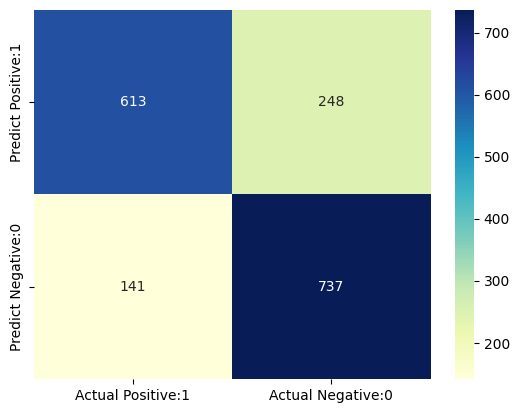

In [323]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [324]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

       False       0.81      0.71      0.76       861
        True       0.75      0.84      0.79       878

    accuracy                           0.78      1739
   macro avg       0.78      0.78      0.78      1739
weighted avg       0.78      0.78      0.78      1739



In [327]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.7763


In [328]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.2237


In [329]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.7120


In [330]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.8130


Hyperparameter Optimization

In [336]:
from sklearn.model_selection import GridSearchCV


parameters = [{'penalty':['l1','l2','elasticnet']}, {'solver':['liblinear','sag','saga']},
              {'C':[0.01,0.1,1, 10, 100, 1000]}]



grid_search = GridSearchCV(estimator = logreg,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(X_train, y_train.values.ravel())


c:\Users\shara\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shara\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shara\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shara\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shara\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the 

GridSearchCV(cv=5,
             estimator=LogisticRegression(random_state=0, solver='liblinear'),
             param_grid=[{'penalty': ['l1', 'l2', 'elasticnet']},
                         {'solver': ['liblinear', 'sag', 'saga']},
                         {'C': [0.01, 0.1, 1, 10, 100, 1000]}],
             scoring='accuracy')

In [337]:
print(grid_search.best_params_)

{'C': 0.01}


In [338]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(grid_search.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(grid_search.score(X_test, y_test)))

Training set score: 0.7985
Test set score: 0.7734


In [343]:
test_data = pd.read_csv('test.csv').drop(['PassengerId','Name'],axis=1)

In [344]:
test_data.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0
1,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0
2,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0
3,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0
4,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0


In [345]:
test_data.shape

(4277, 11)

In [354]:
test_data['CryoSleep'].unique()

array([True, False, nan], dtype=object)

In [357]:
test_data.isna().sum()

HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
dtype: int64

In [358]:
test_data.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0.0,1.0,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0
2,1.0,1.0,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0
4,0.0,0.0,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0


In [347]:
import numpy as np

In [355]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
test_data['CryoSleep']= label_encoder.fit_transform(test_data['CryoSleep'])
test_data['CryoSleep'].unique()

array([1, 0, 2])

In [356]:
test_data['CryoSleep'].replace(2,np.nan,inplace=True)